# Instagram Data Analysis And Fake Account Prediction

In [1]:
import selenium
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium .webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

In [269]:
import matplotlib.pyplot as plt

In [2]:
insta_url="https://www.instagram.com"

In [11]:
driver=webdriver.Chrome()

In [12]:
driver.get(insta_url)
time.sleep(5)

In [13]:
#sending username
element_user=driver.find_element("xpath","/html/body/div[2]/div/div/div[2]/div/div/div[1]/section/main/article/div[2]/div[1]/div[2]/form/div/div[1]/div/label/input")
element_user.send_keys("divyanshdhyani")
#sending password
element_pass=driver.find_element("xpath","/html/body/div[2]/div/div/div[2]/div/div/div[1]/section/main/article/div[2]/div[1]/div[2]/form/div/div[2]/div/label/input")
element_pass.send_keys("2118533@Vivek")
time.sleep(3)

In [14]:
#log In click
element_logIn=driver.find_element("xpath","/html/body/div[2]/div/div/div[2]/div/div/div[1]/section/main/article/div[2]/div[1]/div[2]/form/div/div[3]/button/div")
element_logIn.click()
time.sleep(10)

In [164]:
#I want to collect data on a specific topic as requested by the user 
topic_to_fetch_data=input("Enter the topic that you want data about")

Enter the topic that you want data aboutfood


In [62]:
#clicking on search button
element_search_btn=driver.find_element("xpath","/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div/div/div[2]/div[2]/span/div/a/div")
element_search_btn.click()
time.sleep(3)

In [63]:
#typing topic in search bar
element_search_type=driver.find_element("xpath","/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[1]/div/div/input")
element_search_type.send_keys(topic_to_fetch_data)
time.sleep(5)

In [64]:
#function to extrat the list of accounts that appeared after writing food on search bar
def fetch_list(element_list_followers):
    l=[]
    x=element_list_followers.find_elements("tag name",'a')
    cnt=0
    for i in x:
        temp={}
        text=i.text
        t=text.split("\n")
        if(len(t)>1):
            if(t[0][0]!='#'):
                l.append(t[0])
                cnt+=1
        if(cnt==10):
            break
    return l

In [65]:
#geting the list
element_list_followers=driver.find_element("xpath","/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[2]")
insta_handles=fetch_list(element_list_followers)
print("Following are the 10 instagram handles that are most famous for food")
for i in insta_handles:
    print(i)
time.sleep(5)

Following are the 10 instagram handles that are most famous for food
foodiee_ishh
foodie_in_car
foodpharmer
_foodie_from_dun
pahadifromdoon
foodiewe
food
nepal.food
foodie_ankiit
meghnasfoodmagic


In [256]:
like_count=[]
like_to_follower_ratio=[]
type_of_post=[]
hashtags=[]
date=[]

In [157]:
#again clicking on the search bar
element_search_btn=driver.find_element("xpath","/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div/div/div[2]/div[2]/span/div/a/div")
element_search_btn.click()
time.sleep(5)

# Data Analysis of a specific account

In [254]:
driver.find_element("xpath","/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div/div/div[2]/div[2]/span/div/a/div").click()
time.sleep(5)
element_search_type=driver.find_element("xpath","/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[1]/div/div/input")
element_search_type.send_keys("foodiee_ishh")
time.sleep(5)
driver.find_element("xpath","/html/body/div[2]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/div/div/div[2]/div/div/div[2]/div/div/div[2]/div/a[1]/div[1]/div/div/div[2]/div/div").click()
time.sleep(4)
total_followers=driver.find_elements("class name","_ac2a")[1].text
if total_followers[len(total_followers)-1]=='K':
    total_followers=total_followers[0:len(total_followers)-1]
    total_followers=float(total_followers)*1000
else:
    total_followers=total_followers[0:len(total_followers)-1]
    total_followers=float(total_followers)*100000
driver.find_element("class name","_aagu").click()

In [257]:
#going through posts one by one and fetching information
for i in range(200):
    soup = BeautifulSoup(driver.page_source)
    like=soup.find_all(class_="html-span xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x1hl2dhg x16tdsg8 x1vvkbs")[3].text
    like=like.replace(',','')
    like=int(like)
    if(soup.find(class_=" _acan _acao _acas _aj1- _ap30")):
        type_of_post.append(1)
    else:
        type_of_post.append(0)
    like_count.append(like)
    like_to_follower_ratio.append(like/total_followers)
    date.append(soup.find(class_="x1p4m5qa").attrs['datetime'])
    for hashtag in driver.find_element("class name","_a9zs").find_elements("tag name","a"):
        hashtags.append(hashtag.text)
    if(i==0):
            driver.find_elements("class name","_abm0")[0].click()
    else:
            driver.find_elements("class name","_abm0")[1].click()
    time.sleep(5)

In [258]:
x=driver.find_elements("tag name","div")
for i in x:
    if(i.get_attribute("class")=="x160vmok x10l6tqk x1eu8d0j x1vjfegm"):
        i.click()
        break

[]

In [259]:
like_to_follower_ratio,like_count,date,type_of_post,hashtags

([6.204041666666667,
  0.05575,
  0.13825,
  0.043791666666666666,
  0.05333333333333334,
  0.14104166666666668,
  0.22758333333333333,
  0.10383333333333333,
  0.21154166666666666,
  2.3168333333333333,
  0.10841666666666666,
  7.254625,
  0.08433333333333333,
  0.665625,
  0.160875,
  0.14295833333333333,
  0.21279166666666666,
  0.672875,
  4.257583333333334,
  0.16445833333333335,
  0.23358333333333334,
  0.24554166666666666,
  0.068875,
  0.18004166666666666,
  0.385625,
  2.1385,
  0.2778333333333333,
  0.12204166666666667,
  6.304083333333334,
  0.141125,
  0.18170833333333333,
  0.14945833333333333,
  0.2886666666666667,
  0.15854166666666666,
  1.9887916666666667,
  0.863875,
  0.6000416666666667,
  0.20616666666666666,
  0.08275,
  0.25395833333333334,
  1.1635833333333334,
  0.20883333333333334,
  0.2986666666666667,
  0.595625,
  1.15025,
  0.699875,
  0.1265,
  0.302125,
  11.390833333333333,
  0.6461666666666667,
  0.179375,
  1.6605416666666666,
  0.14904166666666666,
  

In [262]:
data = {
    'like_count': like_count,
    'likes_to_follower_ratio': like_to_follower_ratio,
    'type_of_post': type_of_post,
    'post_date': date
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

     like_count  likes_to_follower_ratio  type_of_post  \
0        148897                 6.204042             0   
1          1338                 0.055750             0   
2          3318                 0.138250             0   
3          1051                 0.043792             0   
4          1280                 0.053333             0   
..          ...                      ...           ...   
195       15357                 0.639875             0   
196       17542                 0.730917             0   
197        2631                 0.109625             0   
198        2648                 0.110333             0   
199        1433                 0.059708             0   

                    post_date  
0    2024-03-16T14:39:51.000Z  
1    2024-07-09T15:37:24.000Z  
2    2024-07-07T15:38:48.000Z  
3    2024-07-05T14:53:34.000Z  
4    2024-07-04T14:50:42.000Z  
..                        ...  
195  2023-11-29T16:04:11.000Z  
196  2023-11-27T16:47:13.000Z  
197  2023-11-26

In [263]:
df.head()

,like_count,likes_to_follower_ratio,type_of_post,post_date
0,148897,6.204042,0,2024-03-16T14:39:51.000Z
1,1338,0.055750,0,2024-07-09T15:37:24.000Z
2,3318,0.138250,0,2024-07-07T15:38:48.000Z
3,1051,0.043792,0,2024-07-05T14:53:34.000Z
4,1280,0.053333,0,2024-07-04T14:50:42.000Z


In [266]:
#saving the data which was scraped
df.to_csv('data_insta.csv',index=False)

In [264]:
dict_hashtag={}
for i in hashtags:
    if i in dict_hashtag:
        dict_hashtag[i]+=1
    else:
        dict_hashtag[i]=1

In [267]:
dict_hashtag = sorted(dict_hashtag.items(), key=lambda item: item[1], reverse=True)

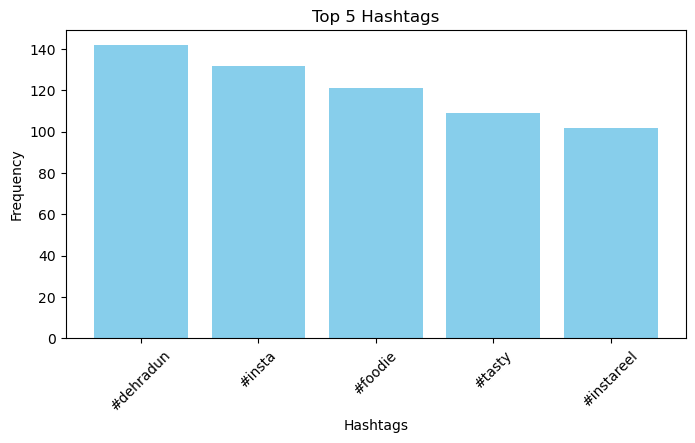

In [272]:
#bar plot of top 5 hashtags
top_hashtags = dict_hashtag[:5]
hashtags_labels, frequencies = zip(*top_hashtags)

# Plot the histogram
plt.figure(figsize=(8, 4))
plt.bar(hashtags_labels, frequencies, color='skyblue')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.title('Top 5 Hashtags')
plt.xticks(rotation=45)
plt.show()

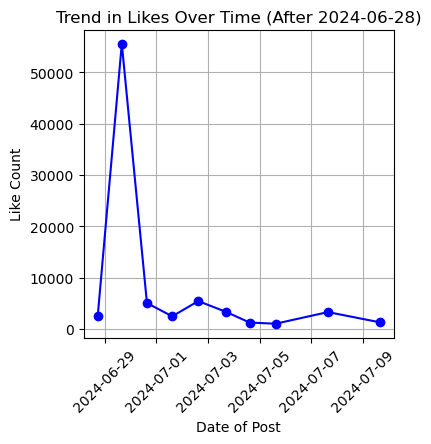

In [363]:
#trend of likes over a month
post_date = pd.to_datetime(date, dayfirst=True)


# Filter the data to include only the dates after '2024-06-28'
df_filtered = df[df['post_date'] > '2024-06-28']

# Set the date as the index
df_filtered.set_index('post_date', inplace=True)

# Plot the line graph
plt.figure(figsize=(4, 4))
plt.plot(df_filtered.index, df_filtered['like_count'], marker='o', linestyle='-', color='b')
plt.xlabel('Date of Post')
plt.ylabel('Like Count')
plt.title('Trend in Likes Over Time (After 2024-06-28)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Training the model (Like prediction System)

In [3]:
data_insta=pd.read_csv('data_insta.csv')

In [4]:
data_insta

,like_count,likes_to_follower_ratio,type_of_post,post_date
0,148897,6.204042,0,2024-03-16T14:39:51.000Z
1,1338,0.055750,0,2024-07-09T15:37:24.000Z
2,3318,0.138250,0,2024-07-07T15:38:48.000Z
3,1051,0.043792,0,2024-07-05T14:53:34.000Z
4,1280,0.053333,0,2024-07-04T14:50:42.000Z
...,...,...,...,...
195,15357,0.639875,0,2023-11-29T16:04:11.000Z
196,17542,0.730917,0,2023-11-27T16:47:13.000Z
197,2631,0.109625,0,2023-11-26T16:35:57.000Z
198,2648,0.110333,0,2023-11-24T16:35:32.000Z


In [6]:
#converting the date column in appropriate format for training
data_insta['post_date'] = pd.to_datetime(data_insta['post_date'], dayfirst=True)

# Extract year, month, day, day of the week, and whether it's a weekend
data_insta['year'] = data_insta['post_date'].dt.year
data_insta['month'] = data_insta['post_date'].dt.month
data_insta['day'] = data_insta['post_date'].dt.day
data_insta['day_of_week'] = data_insta['post_date'].dt.dayofweek  # Monday=0, Sunday=6
data_insta['is_weekend'] = data_insta['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Drop the original post_date column if it is no longer needed
data_insta.drop('post_date', axis=1, inplace=True)

In [7]:
data_insta.head()

,like_count,likes_to_follower_ratio,type_of_post,year,month,day,day_of_week,is_weekend
0,148897,6.204042,0,2024,3,16,5,1
1,1338,0.055750,0,2024,7,9,1,0
2,3318,0.138250,0,2024,7,7,6,1
3,1051,0.043792,0,2024,7,5,4,0
4,1280,0.053333,0,2024,7,4,3,0


In [9]:
data_insta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   like_count               200 non-null    int64  
 1   likes_to_follower_ratio  200 non-null    float64
 2   type_of_post             200 non-null    int64  
 3   year                     200 non-null    int64  
 4   month                    200 non-null    int64  
 5   day                      200 non-null    int64  
 6   day_of_week              200 non-null    int64  
 7   is_weekend               200 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 12.6 KB


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [11]:
y = data_insta['like_count']
data_insta = data_insta.drop('like_count', axis=1) # df.drop(columns=['x']) or del df['x']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data_insta, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
model.score(X_test,y_test)

0.9786266210041612

In [15]:
X_test.iloc[0]

likes_to_follower_ratio       0.641625
type_of_post                  0.000000
year                       2024.000000
month                         3.000000
day                          21.000000
day_of_week                   3.000000
is_weekend                    0.000000
Name: 95, dtype: float64

In [305]:
y_predicted=model.predict(X_test)

In [352]:
y_predicted

array([15339.89,  3388.94,  4316.5 ,  1561.91,  6811.47, 27476.46,
        5380.65,  2586.55,  2276.08, 16341.72,  5852.17,   739.89,
        9466.87,  9421.14,  2638.28,  1183.32, 12008.18,   889.46,
        1806.44,  2955.08,  8790.18,  5077.16,  5074.71,  6035.54,
       14752.21,  6183.47,  6732.89,  6427.25,   719.76,  6359.28,
       44093.5 , 90854.56,  9108.38,  3194.7 ,  3468.93, 17991.69,
        2076.41,  2591.43,  1710.14,  5101.13])

In [354]:
import joblib

In [356]:
#dumping the model
joblib.dump(model, 'fake_account_predictor.pkl')

['fake_account_predictor.pkl']

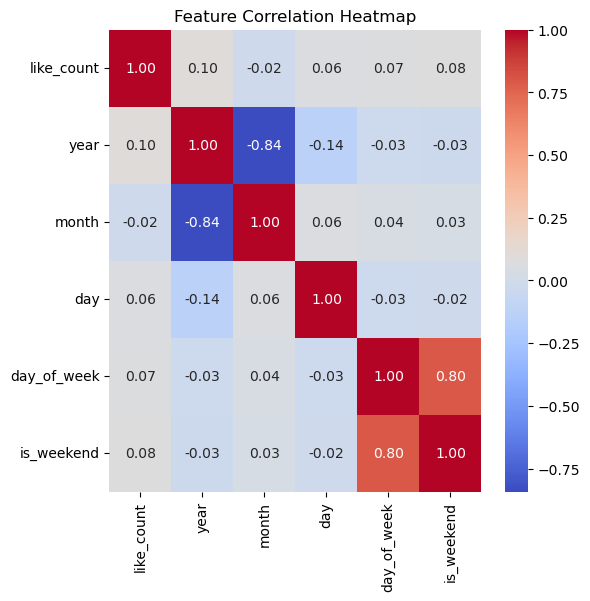

In [309]:
import seaborn as sns
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Fake Account Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

In [3]:
instagram_df_train=pd.read_csv('train_fake.csv')
instagram_df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [4]:
# Load the testing data
instagram_df_test=pd.read_csv('test_fake.csv')
instagram_df_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


In [5]:
instagram_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [6]:
# Get the statistical summary of the dataframe
instagram_df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [7]:
instagram_df_train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [8]:
# Get the number of unique values in the "profile pic" feature
instagram_df_train['profile pic'].value_counts()


1    404
0    172
Name: profile pic, dtype: int64

In [9]:
instagram_df_train['fake'].value_counts()

0    288
1    288
Name: fake, dtype: int64

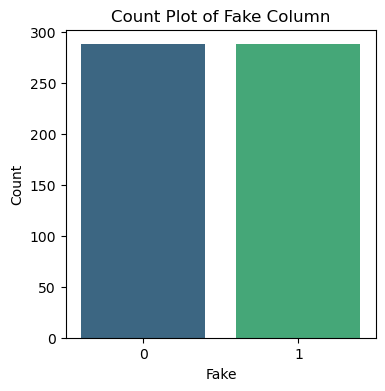

In [10]:
plt.figure(figsize=(4, 4))
sns.countplot(x='fake', data=instagram_df_train, palette='viridis')
plt.xlabel('Fake')
plt.ylabel('Count')
plt.title('Count Plot of Fake Column')
plt.show()

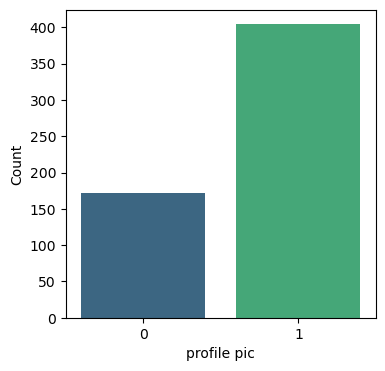

In [11]:
plt.figure(figsize=(4, 4))
sns.countplot(x='profile pic', data=instagram_df_train, palette='viridis')
plt.xlabel('profile pic')
plt.ylabel('Count')
plt.show()

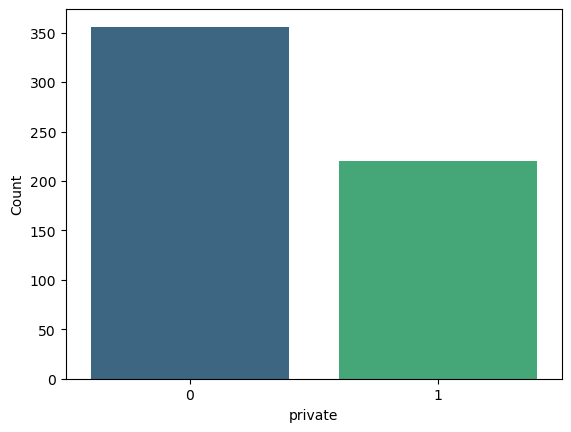

In [12]:
sns.countplot(x='private', data=instagram_df_train, palette='viridis')
plt.xlabel('private')
plt.ylabel('Count')
plt.show()

C:\Users\890di\AppData\Local\Temp\ipykernel_29568\3039198286.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(instagram_df_train['nums/length username'])


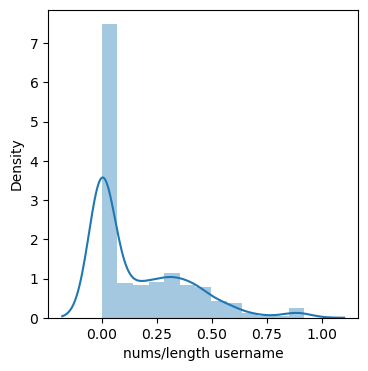

In [13]:
plt.figure(figsize = (4, 4))
sns.distplot(instagram_df_train['nums/length username'])
plt.show()

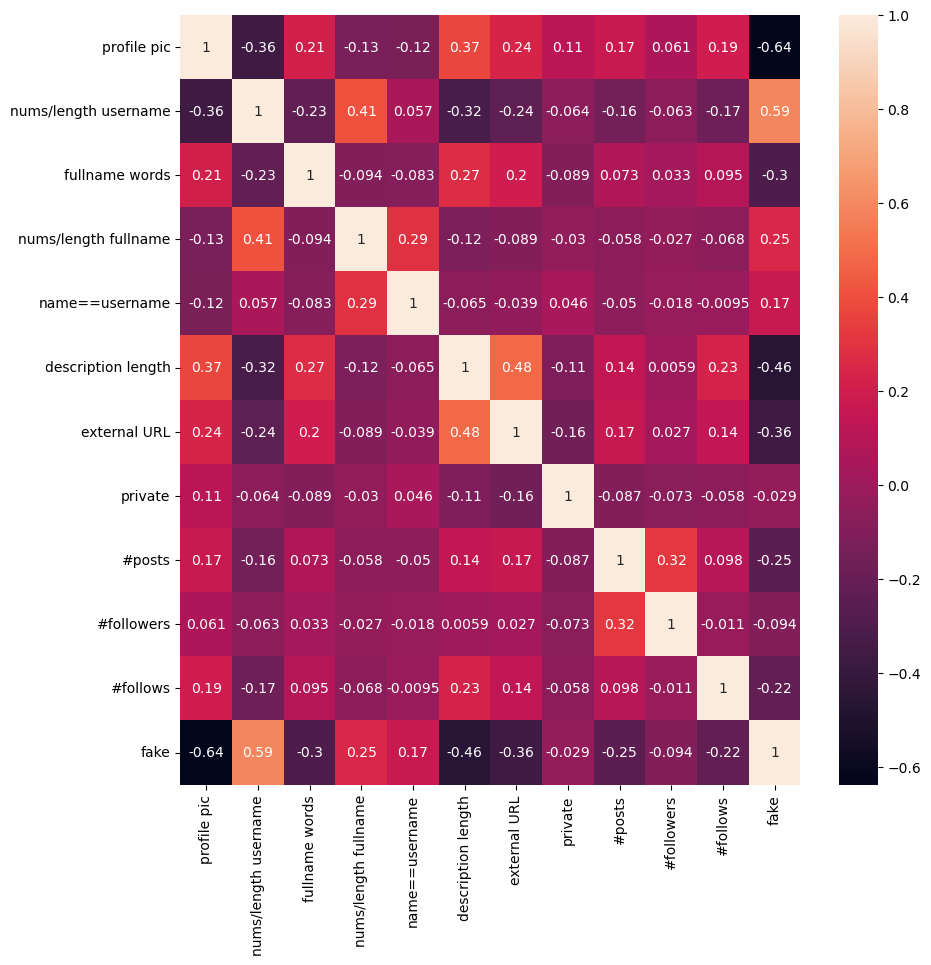

In [14]:
# Correlation plot
plt.figure(figsize=(10, 10))
cm = instagram_df_train.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
plt.show()

In [15]:
# Training and testing dataset (inputs)
X_train = instagram_df_train.drop(columns = ['fake'])
X_test = instagram_df_test.drop(columns = ['fake'])
X_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [16]:
# Training and testing dataset (Outputs)
y_train = instagram_df_train['fake']
y_test = instagram_df_test['fake']
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [17]:
# Scale the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [18]:
#diffrent algorithms to get the best results
#1-Linear regression

In [19]:
from sklearn.linear_model import LinearRegression
alg=LinearRegression()
alg.fit(X_train,y_train)
alg.score(X_test,y_test)

0.541612052295368

In [20]:
#2-SVM
from sklearn import svm
from sklearn.model_selection import GridSearchCV
clf = svm.SVC()
grid = {'C' : [1e2, 1e3, 5e3, 1e4, 5e4, 1e5],
       'gamma' : [1e-3, 5e-4, 1e-4, 5e-3]}
abc = GridSearchCV(clf, grid)
abc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [100.0, 1000.0, 5000.0, 10000.0, 50000.0,
                               100000.0],
                         'gamma': [0.001, 0.0005, 0.0001, 0.005]})

In [21]:
abc.best_estimator_

SVC(C=10000.0, gamma=0.0001)

In [22]:
clf = svm.SVC(C=10000.0, gamma=0.0001)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8666666666666667

In [23]:
#Svm gives way better results than linear regression model

In [24]:
y_pred=clf.predict(X_test)

In [28]:
clf.pred([])

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        60
           1       0.88      0.85      0.86        60

    accuracy                           0.87       120
   macro avg       0.87      0.87      0.87       120
weighted avg       0.87      0.87      0.87       120



In [26]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

Accuracy Score: 0.87


In [358]:
print(pd.__version__)

1.5.3


In [359]:
import sklearn
print(sklearn.__version__)

1.2.1
